# Imports

In [1]:
import os
import pickle
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data

In [ ]:
mel_sm_path = "/local_disk/apollon/rwhetten/dataselection/mel_small_ckpt.pkl"
speaker_sm_path = "/local_disk/apollon/rwhetten/dataselection/speaker_small_ckpt.pkl"

with open(mel_sm_path, "rb") as f:
    mel_sm = pickle.load(f)

with open(speaker_sm_path, "rb") as f:
    speaker = pickle.load(f)

In [2]:
# load in
mel_lg_path = "/local_disk/apollon/rwhetten/dataselection/mel_large_ckpt.pkl"
speaker_lg_path = "/local_disk/apollon/rwhetten/dataselection/speaker_large_ckpt.pkl"

with open(mel_lg_path, "rb") as f:
    mel_lg = pickle.load(f)

with open(speaker_lg_path, "rb") as f:
    speaker_lg = pickle.load(f)

# MFCCs + ' + "

In [4]:
df = pd.DataFrame.from_dict(mel_lg['results']).T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
snafuinfinityfootball_vsWOBURN_092118-CL19_SLASH_football_vsWOBURN_092118-CL19_DOT_mp3_00025.flac,-150.178024,20.112110,-11.501924,-1.449854,-15.125900,0.157504,-5.432830,-1.768510,-3.259856,-3.649934,...,-0.001829,0.001195,-0.011839,0.007008,0.006832,0.007198,-0.001744,-0.002431,-0.017000,-0.012432
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac,-179.132660,25.008080,2.044729,6.493776,-3.964765,-2.304045,1.511492,-2.448147,1.143050,0.940334,...,-0.008804,0.022103,0.023557,-0.013852,0.001505,0.003159,0.004628,-0.004877,-0.002304,-0.007152
texas_terror_1935_SLASH_texas_terror_1935_DOT_mp3_00002.flac,-181.057144,26.448055,-7.964648,2.730549,-0.780316,-0.657237,-0.104363,0.957595,-2.103266,-0.983917,...,0.039257,0.016973,-0.012449,0.004981,0.030585,0.010287,-0.021672,-0.019635,-0.012271,-0.001298
unfinished_task_SLASH_unfinished_task_DOT_mp3_00022.flac,-133.819336,42.418552,-22.415033,7.140134,1.418300,-9.882423,-9.354074,-4.318173,-3.120260,-1.788946,...,0.007597,-0.003642,0.006924,0.003304,-0.006618,-0.003144,0.000489,0.005005,-0.000316,0.000715
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_DOT_uscourts_DOT_ca3_DOT_19-2975_DOT_2020-10-21_DOT_mp3_00006.flac,-175.453720,27.233545,-13.083720,8.682267,-9.429398,-9.109363,-6.361362,-16.926861,0.736825,0.722593,...,-0.004237,-0.033426,-0.016063,0.006987,-0.007664,0.006543,0.017294,0.017431,0.013511,0.006377


In [9]:
len(df)

9487873

In [8]:
with open('mel_lg.npy', 'wb') as f:
    np.save(f, np.array(df))

In [22]:
k=10
mb_kmeans = MiniBatchKMeans(n_clusters=k,
                            random_state=42,
                            batch_size=64 * k,
                            init='k-means++', n_init=1, init_size=100000,
                            reassignment_ratio=5e-4,
                            verbose=2)

mb_kmeans.fit(df)
predictions = mb_kmeans.labels_
cluster_centers = mb_kmeans.cluster_centers_

Init 1/1 with method k-means++
Inertia for init 1/1: 91701128.0
Minibatch step 1/1482480: mean batch inertia: 897.0310546875
Minibatch step 2/1482480: mean batch inertia: 616.39267578125, ewa inertia: 616.39267578125
Minibatch step 3/1482480: mean batch inertia: 639.80341796875, ewa inertia: 616.3958341020708
Minibatch step 4/1482480: mean batch inertia: 608.22548828125, ewa inertia: 616.3947318485364
Minibatch step 5/1482480: mean batch inertia: 586.56572265625, ewa inertia: 616.3907076454572
Minibatch step 6/1482480: mean batch inertia: 588.523095703125, ewa inertia: 616.3869480526035
Minibatch step 7/1482480: mean batch inertia: 620.271923828125, ewa inertia: 616.3874721709668
Minibatch step 8/1482480: mean batch inertia: 574.823876953125, ewa inertia: 616.3818648661187
Minibatch step 9/1482480: mean batch inertia: 573.807763671875, ewa inertia: 616.3761212348765
Minibatch step 10/1482480: mean batch inertia: 582.5794921875, ewa inertia: 616.3715617640001
Minibatch step 11/1482480: 

In [23]:
limit = 10000

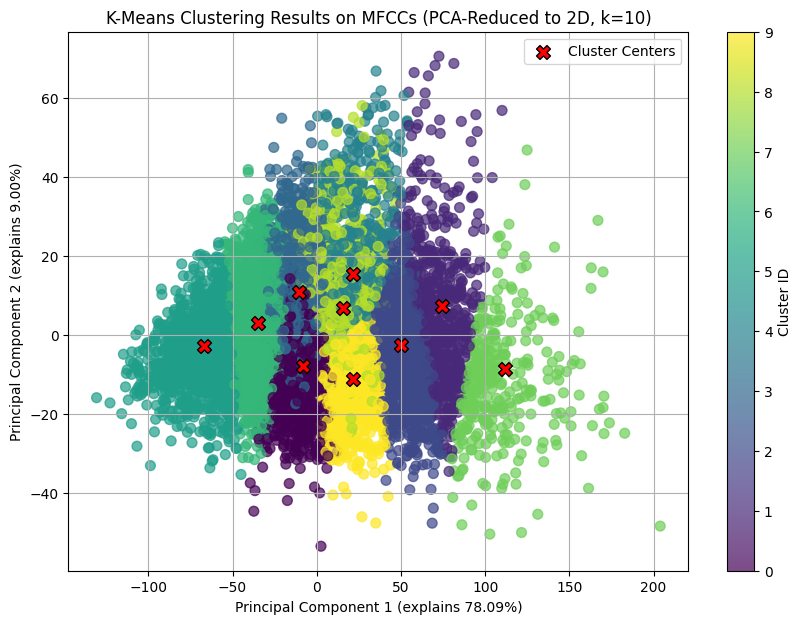

In [26]:
pca_2d = PCA(n_components=2, random_state=42)
d_pca_2d = pca_2d.fit_transform(df[:limit])
cluster_centers_pca_2d = pca_2d.transform(cluster_centers)

plt.figure(figsize=(10, 7))
# Scatter plot of PCA-reduced data points, colored by their assigned cluster
scatter_2d = plt.scatter(d_pca_2d[:, 0], d_pca_2d[:, 1], c=predictions[:limit], cmap='viridis', s=50, alpha=0.7)
# Plot the PCA-reduced cluster centers
plt.scatter(cluster_centers_pca_2d[:, 0], cluster_centers_pca_2d[:, 1], marker='X', s=100, color='red',
            edgecolor='black', label='Cluster Centers')
plt.title(f'K-Means Clustering Results on MFCCs (PCA-Reduced to 2D, k={k})')
plt.xlabel(f'Principal Component 1 (explains {pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 (explains {pca_2d.explained_variance_ratio_[1]*100:.2f}%)')
plt.colorbar(scatter_2d, label='Cluster ID')
plt.legend()
plt.grid(True)
# plt.show()
plt.savefig('mel_lg_kmeans_10_pca_2.svg')

# Speaker Embeddings

In [27]:
df_speaker = pd.DataFrame.from_dict(speaker_lg['results']).T
df_speaker.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
snafuinfinityfootball_vsWOBURN_092118-CL19_SLASH_football_vsWOBURN_092118-CL19_DOT_mp3_00025.flac,-0.046254,-0.064087,-0.096097,-0.107513,-0.050994,-0.032374,0.249068,-0.219559,0.045343,0.027503,...,-0.205633,-0.043007,-0.100376,-0.094326,-0.042314,-0.124987,0.033182,0.244299,0.234942,0.045202
Grad2009_SLASH_Grad2009_DOT_mp3_00006.flac,0.092818,-0.343982,-0.237657,-0.384233,0.456225,-0.012949,0.179669,-0.305312,0.140377,-0.175030,...,0.054900,0.007778,0.040266,0.204871,0.114417,-0.367068,-0.240021,0.098663,0.197409,-0.117200
texas_terror_1935_SLASH_texas_terror_1935_DOT_mp3_00002.flac,-0.054206,-0.088970,-0.124893,-0.014069,-0.140625,0.161785,0.026947,-0.030485,0.082166,-0.058114,...,-0.150152,0.055224,0.112032,0.084941,0.036592,-0.088939,-0.032801,0.174502,0.311173,-0.001009
unfinished_task_SLASH_unfinished_task_DOT_mp3_00022.flac,0.055183,-0.191430,-0.021690,-0.285761,0.225623,-0.086730,0.106433,-0.339067,0.055312,0.150259,...,-0.038836,0.299592,0.099919,0.070111,-0.025070,-0.167474,-0.147892,0.332172,0.108491,-0.081120
gov_DOT_uscourts_DOT_ca3_DOT_19-2975_SLASH_gov_DOT_uscourts_DOT_ca3_DOT_19-2975_DOT_2020-10-21_DOT_mp3_00006.flac,-0.241946,-0.115047,-0.134957,-0.243144,0.081856,-0.002123,0.079598,0.109838,-0.040556,0.000471,...,0.121072,-0.130224,0.012651,-0.470264,-0.252125,-0.141382,0.125283,0.044098,0.149792,-0.065720


In [33]:
len(df_speaker) == len(df)

True

In [29]:
# with open('speaker_lg.npy', 'wb') as f:
#     np.save(f, np.array(df_speaker))

In [41]:
k=100
mb_kmeans = MiniBatchKMeans(n_clusters=k,
                            random_state=42,
                            batch_size=64 * k,
                            init='k-means++', n_init=1, init_size=100000,
                            reassignment_ratio=5e-4,
                            verbose=2)

mb_kmeans.fit(df_speaker)
predictions = mb_kmeans.labels_
cluster_centers = mb_kmeans.cluster_centers_

Init 1/1 with method k-means++
Inertia for init 1/1: 1168212.375
Minibatch step 1/148248: mean batch inertia: 11.74656005859375
Minibatch step 2/148248: mean batch inertia: 9.169507446289062, ewa inertia: 9.169507446289062
Minibatch step 3/148248: mean batch inertia: 8.937924194335938, ewa inertia: 9.169195019540457
Minibatch step 4/148248: mean batch inertia: 8.830819091796876, ewa inertia: 9.168738519815111
Minibatch step 5/148248: mean batch inertia: 8.780599365234375, ewa inertia: 9.168214884996749
Minibatch step 6/148248: mean batch inertia: 8.750467529296875, ewa inertia: 9.167651306037653
Minibatch step 7/148248: mean batch inertia: 8.723016357421875, ewa inertia: 9.16705145328431
Minibatch step 8/148248: mean batch inertia: 8.783201904296876, ewa inertia: 9.166533605531797
Minibatch step 9/148248: mean batch inertia: 8.763055419921875, ewa inertia: 9.165989276973491
Minibatch step 10/148248: mean batch inertia: 8.670405883789062, ewa inertia: 9.165320690161234
Minibatch step 11

In [50]:
limit = 10000

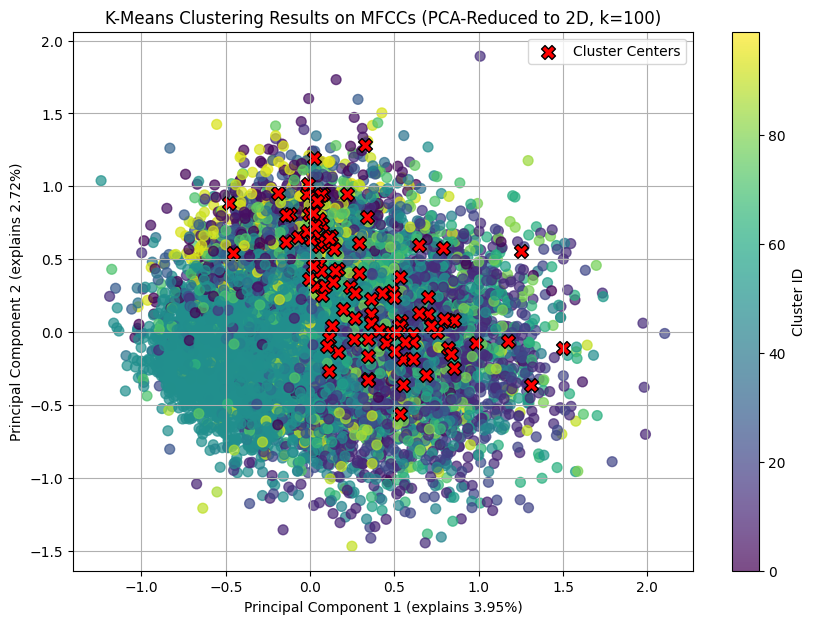

In [51]:
pca_2d = PCA(n_components=2, random_state=42)
d_pca_2d = pca_2d.fit_transform(df_speaker[:limit])
cluster_centers_pca_2d = pca_2d.transform(cluster_centers)

plt.figure(figsize=(10, 7))
# Scatter plot of PCA-reduced data points, colored by their assigned cluster
scatter_2d = plt.scatter(d_pca_2d[:, 0], d_pca_2d[:, 1], c=predictions[:limit], cmap='viridis', s=50, alpha=0.7)
# Plot the PCA-reduced cluster centers
plt.scatter(cluster_centers_pca_2d[:, 0], cluster_centers_pca_2d[:, 1], marker='X', s=100, color='red',
            edgecolor='black', label='Cluster Centers')
plt.title(f'K-Means Clustering Results on MFCCs (PCA-Reduced to 2D, k={k})')
plt.xlabel(f'Principal Component 1 (explains {pca_2d.explained_variance_ratio_[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 (explains {pca_2d.explained_variance_ratio_[1]*100:.2f}%)')
plt.colorbar(scatter_2d, label='Cluster ID')
plt.legend()
plt.grid(True)
plt.show()
# plt.savefig('speaker_lg_kmeans_100_pca_2.svg')